In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


ev = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


## Data Cleaning

### Filtering out columns

In [81]:
ev.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [82]:
ev_subset = ev[['Model Year','Make', 'Model', 'Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range','Base MSRP']]
ev_subset.columns

Index(['Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP'],
      dtype='object')

### Checking for zero and none values

In [83]:
ev_subset.isna().sum()

Model Year                                             0
Make                                                   0
Model                                                104
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
dtype: int64

In [84]:
emp = ev_subset[ev_subset['Model'].isna()]
emp

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
400,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
524,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
1052,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
1518,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
2049,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
...,...,...,...,...,...,...,...
117805,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
118038,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
119202,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
120160,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0


In [85]:
emp['Make'].value_counts()

VOLVO    104
Name: Make, dtype: int64

In [86]:
emp['Model Year'].value_counts()

2023    104
Name: Model Year, dtype: int64

In [87]:
volvo = ev_subset[ev_subset['Make'] == 'VOLVO']
volvo['Model'].value_counts()

XC90    814
XC60    696
XC40    488
C40     210
S60      80
S90      25
V60      12
Name: Model, dtype: int64

In [88]:
ev_subset.fillna('XC90', inplace=True)

C:\Users\MARINE\AppData\Local\Temp\ipykernel_18444\147016190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_subset.fillna('XC90', inplace=True)


In [89]:
ev_subset.isna().sum()

Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
dtype: int64

#### Zeroes at Base MSRP

In [90]:
ev_subset['Base MSRP'].value_counts()

0         118511
69900       1454
31950        406
52900        214
32250        156
54950        137
59900        128
39995        119
44100         98
36900         97
64950         87
33950         81
45600         76
52650         65
34995         62
36800         50
55700         47
53400         32
98950         22
110950        22
81100         19
90700         18
102000        17
75095         16
184400        12
43700         11
109000         7
89100          6
91250          4
32995          3
845000         1
Name: Base MSRP, dtype: int64

In [91]:
ev_subset['Base MSRP'].mean()

1627.059797668432

In [92]:
ev_subset_base = pd.DataFrame(ev_subset['Base MSRP'])
ev_subset_base.head()

,Base MSRP
0,0
1,0
2,0
3,0
4,0


In [93]:
ev_subset_base.drop(ev_subset_base[ev_subset_base['Base MSRP'] == 0].index, inplace=True)
ev_subset_base.value_counts()

Base MSRP
69900        1454
31950         406
52900         214
32250         156
54950         137
59900         128
39995         119
44100          98
36900          97
64950          87
33950          81
45600          76
52650          65
34995          62
36800          50
55700          47
53400          32
98950          22
110950         22
81100          19
90700          18
102000         17
75095          16
184400         12
43700          11
109000          7
89100           6
91250           4
32995           3
845000          1
dtype: int64

In [94]:
ev_subset_base.mean()

Base MSRP    57244.159215
dtype: float64

In [95]:
ev_subset['Base MSRP'] = ev_subset['Base MSRP'].replace(0, int(ev_subset_base.mean()))
ev_subset['Base MSRP'].value_counts()

C:\Users\MARINE\AppData\Local\Temp\ipykernel_18444\213189466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_subset['Base MSRP'] = ev_subset['Base MSRP'].replace(0, int(ev_subset_base.mean()))


57244     118511
69900       1454
31950        406
52900        214
32250        156
54950        137
59900        128
39995        119
44100         98
36900         97
64950         87
33950         81
45600         76
52650         65
34995         62
36800         50
55700         47
53400         32
98950         22
110950        22
81100         19
90700         18
102000        17
75095         16
184400        12
43700         11
109000         7
89100          6
91250          4
32995          3
845000         1
Name: Base MSRP, dtype: int64

#### Confirming all 0s in Electric Range are vehicles whose Eligibility unknown as battery range has not been researched

In [96]:
ev_subset[ev_subset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched'].count()[0]

47417

In [97]:
el_un = ev[ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched']
el_un['Electric Range'].value_counts()

0    47417
Name: Electric Range, dtype: int64

### Outliers

In [98]:
ev_subset[ev_subset['Electric Range'] > 330].count()[0]

72

In [99]:
ev_subset[ev_subset['Electric Range'] < 20].count()[0]

55318

#### Replacing outliers in the Electric Range with the lower and upper limits

In [100]:
def replace_outliers(data, column, min_value, max_value):
    data[column] = data[column].clip(lower=min_value, upper=max_value)
    return data

min_value = 0
max_value = 330

ev_subset = replace_outliers(ev_subset, 'Electric Range', min_value, max_value)
ev_subset[ev_subset['Electric Range'] > 330].count()[0]

C:\Users\MARINE\AppData\Local\Temp\ipykernel_18444\1000744698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].clip(lower=min_value, upper=max_value)


0

In [101]:
ev_subset[ev_subset['Electric Range'] < 0].count()[0]

0

In [102]:
ev_subset.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,57244
1,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,57244
2,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,57244
3,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,57244
4,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,57244


### Encoding

In [103]:
lb = LabelEncoder()
lb

LabelEncoder()

In [104]:
columns_to_encode = ['Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
for column in columns_to_encode:
    ev_subset[column] = lb.fit_transform(ev_subset[column])
    
ev_subset.head()

C:\Users\MARINE\AppData\Local\Temp\ipykernel_18444\3946786639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_subset[column] = lb.fit_transform(ev_subset[column])


,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,2018,29,68,Battery Electric Vehicle (BEV),0,215,57244
1,2020,29,68,Battery Electric Vehicle (BEV),0,308,57244
2,2021,0,29,Battery Electric Vehicle (BEV),0,222,57244
3,2019,29,68,Battery Electric Vehicle (BEV),0,220,57244
4,2014,9,19,Plug-in Hybrid Electric Vehicle (PHEV),2,19,57244


In [105]:
oe = OrdinalEncoder()
oe

OrdinalEncoder()

In [106]:
ev_subset[['Electric Vehicle Type']] = oe.fit_transform(ev_subset[['Electric Vehicle Type']])
ev_subset.head()

C:\Users\MARINE\AppData\Local\Temp\ipykernel_18444\1744972901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_subset[['Electric Vehicle Type']] = oe.fit_transform(ev_subset[['Electric Vehicle Type']])


,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,2018,29,68,0.0,0,215,57244
1,2020,29,68,0.0,0,308,57244
2,2021,0,29,0.0,0,222,57244
3,2019,29,68,0.0,0,220,57244
4,2014,9,19,1.0,2,19,57244


In [107]:
ev_subset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

0    59179
1    47417
2    15382
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

## The Model

### Splitting the data

In [108]:
X = ev_subset.drop(columns=['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
X.columns

Index(['Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Electric Range', 'Base MSRP'],
      dtype='object')

In [109]:
y = ev_subset['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
y.head()

0    0
1    0
2    0
3    0
4    2
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int32

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Random Forest

In [111]:
# Determining value of k
import math
math.sqrt(len(y_test))

156.19218930535547

In [124]:
clf = KNeighborsClassifier(n_neighbors=200, metric='euclidean')
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=200)

In [125]:
y_pred = clf.predict(X_test)
y_pred

C:\Users\MARINE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, ..., 2, 1, 1])

### Model Evaluation

In [126]:
accuracy_score(y_pred, y_test)

0.9964748319396622

In [127]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11890
           1       1.00      1.00      1.00      9480
           2       0.98      0.99      0.99      3026

    accuracy                           1.00     24396
   macro avg       0.99      0.99      0.99     24396
weighted avg       1.00      1.00      1.00     24396



In [128]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[11843,     0,    47],
       [    0,  9477,     3],
       [   36,     0,  2990]], dtype=int64)

#### Plotting the Confusion Matrix

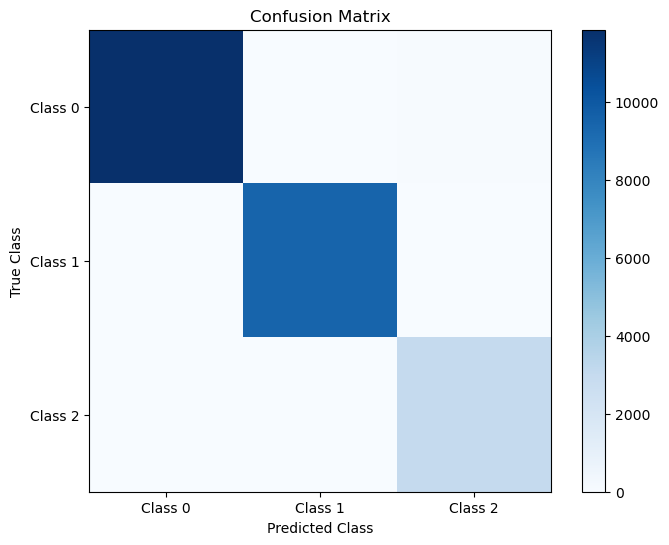

In [129]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(np.arange(3), ['Class 0', 'Class 1', 'Class 2'])
plt.yticks(np.arange(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()